# Inspecting the King County House Sales Data Set

Importing Libraries and the Data Set

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


-----
# Cleaning the Data set

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

whilst inspecting the data you can also notice that some of the entries in sqft_basement are '?' which is a string value and will interfere with any descriptive statistics we try to apply

In [34]:
df['date'].dtype
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


In [35]:
df['sqft_basement'] = df['sqft_basement'].replace('?', np.NaN)

In [36]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that 4 columns have missing values:

* waterfront
* view
* sqft_basement
* yr_renovated

In [37]:
#replacing missing values with 0 for view, waterfront and yr_renovated, since it is the most common.
df['view'] = df['view'].fillna(value=0)
df['waterfront'] = df['waterfront'].fillna(value=0)
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].median())
df['yr_renovated'] = df['yr_renovated'].fillna(value=0)

print('view value count')
print(df['view'].value_counts())
print()
print('waterfront value count')
print(df['waterfront'].value_counts())
print()
print('yr_renovated value count')
print(df['yr_renovated'].value_counts())

view value count
0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

waterfront value count
0.0    21451
1.0      146
Name: waterfront, dtype: int64

yr_renovated value count
0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


The reason i have replaced the values with 0 is becuase most of the values in that column are 0 from the start so me changing the null values to 0 will have very small statitiscal effect on the overall data.

In [38]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

 -----------
# Statistical Anaylsis


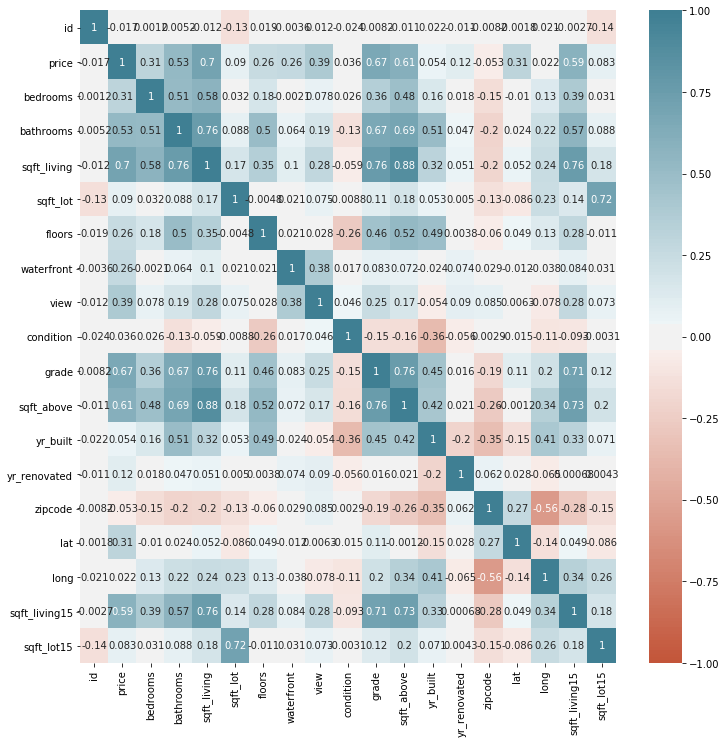

In [39]:
# correlation heatmap between every column
correlation = df.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap=sns.diverging_palette(20, 220, n=200))

In [40]:
highly_corr = correlation[(correlation>0.75 )&(correlation<1)]
highly_correlated_df = pd.DataFrame(highly_corr.unstack().sort_values(ascending = False).drop_duplicates().head(5))
highly_correlated_df.reset_index().rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0:'Correlation'})

,Feature1,Feature2,Correlation
0,sqft_above,sqft_living,0.876448
1,grade,sqft_living,0.762779
2,sqft_living15,sqft_living,0.756402
3,sqft_above,grade,0.756073
4,sqft_living,bathrooms,0.755758


Looking at the number of times certain Conditions and Grades appear


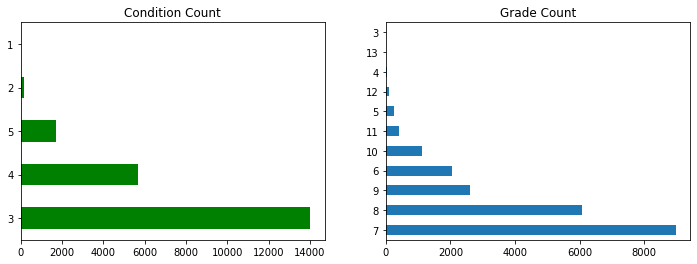

In [41]:
# we can see the number of times a condition appears. 5 being excellent and 1 being unaccaptable.
# as for Grade anything above 10 means that there has been Designer/Custom works done to the House.
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax1 = ax[0]
ax2 = ax[1]
df.condition.value_counts().plot(kind='barh', color='green', ax=ax1, title='Condition Count')
df.grade.value_counts().plot(kind='barh', ax=ax2, title='Grade Count')

# Q1.  Which price are the most houses being sold and bought at and which price range has most activity and demand

The Real Estate Agency wants to find out which market segment is most active and so we will first find a price range where there is alot of activity and is within their budget so that they can focus on that specific segment.

In [42]:
#we can see the basic statistical info of price column.
df.price.describe().round(-3)

count      22000.0
mean      540000.0
std       367000.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

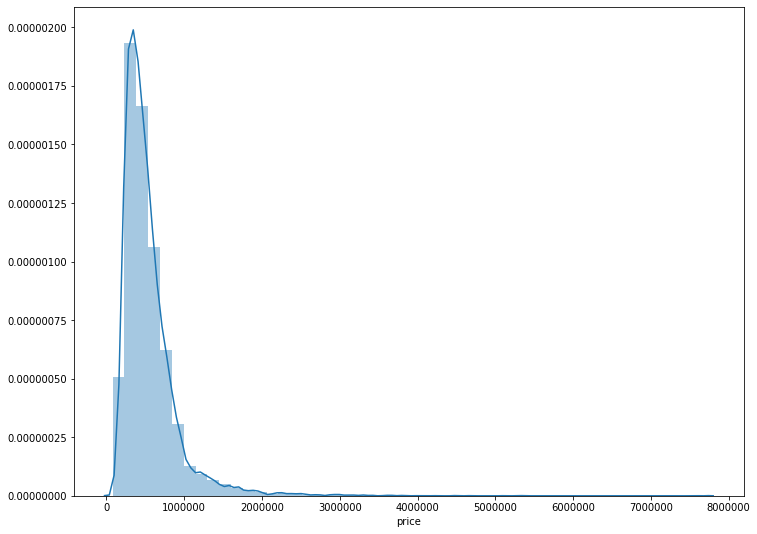

In [43]:
#making a distplot for price column to see what the distribution of prices for houses sold looks like
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.distplot(df['price'])

from the above we can see that most of the house prices center around 600k.we can also see that most houses sold are under 1m so if we are to show them in price bands instead of just the price it will show us a more accurate trend.

##### Price Bands will be:

11 --> 2m+

10 --> 1m+

 9--> 800-999k 
 
 8-->700-800k
 
 7-->600-700k
 
 6-->500-600k
 
 5-->400-500k
 
 4-->300-400k
 
 3-->200-300k
 
 2-->100-200k
 
 1-->under 100k

then i will add it as a new column so that i can clearly see the number of houses sold in each band


In [44]:
# create a new column which puts the prices into range bands so that we can compare them and make it less cluttered.
price_list = df['price']
df['price_bands'] = df['price']
tier_arr = []
for idx, price in enumerate(price_list):
    if price >= 2000000:
        tier_arr.append(11)
    elif price >= 1000000:
        tier_arr.append(10)
    elif price >= 800000:
        tier_arr.append(9)
    elif price >= 700000 :
        tier_arr.append(8)
    elif price >= 600000 :
        tier_arr.append(7)
    elif price >= 500000 :
        tier_arr.append(6)
    elif price >= 400000:
        tier_arr.append(5)
    elif price >= 300000:
        tier_arr.append(4)
    elif price >= 200000:
        tier_arr.append(3)
    elif price >= 100000:
        tier_arr.append(2)
    else:
        tier_arr.append(1)       
# create a new column that will assign the price band to each house sold.
df['price_bands'] = tier_arr
df.price_bands.head()

0    3
1    6
2    2
3    7
4    6
Name: price_bands, dtype: int64

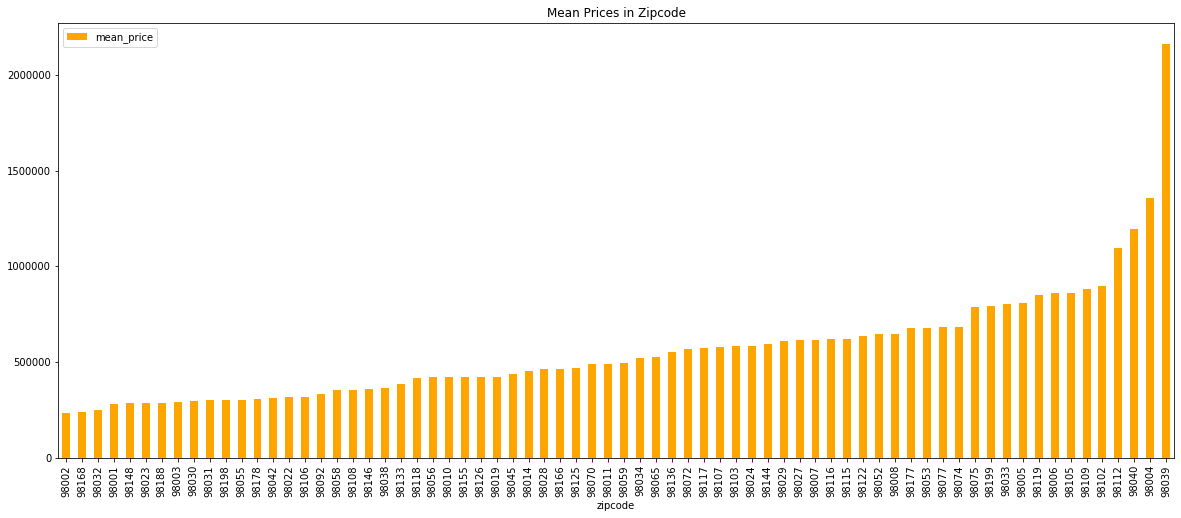

In [45]:
# Mean Price by Zipcode
df.groupby('zipcode').agg(mean_price= ('price', 'mean'))\
.sort_values('mean_price').plot(kind='bar', figsize=(20,8), color='orange', title='Mean Prices in Zipcode')

In [46]:
# we can see for the most part that prices are evenly spread except for the few ourliers under 100k and over 2m in price
df.price_bands.value_counts(sort=False)

1       24
2      759
3     3645
4     4253
5     3713
6     2839
7     1954
8     1410
9     1510
10    1282
11     208
Name: price_bands, dtype: int64

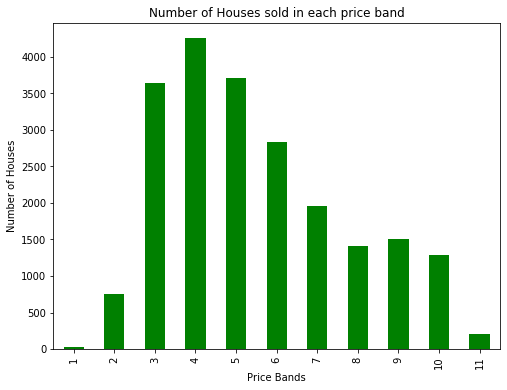

In [47]:
# it is slighlty skewed but very close to being a normal distrubiton
df.price_bands.value_counts(sort=False).plot(kind='bar',
                                             title= 'Number of Houses sold in each price band',
                                             figsize=(8,6),
                                             color='green')
plt.xlabel('Price Bands')
plt.ylabel('Number of Houses');

from this we can infer that due to the high amount of houses sold in price bands 3-6 thus meaning alot of activity and also falls in a reasonable price range so it may be more profitable to focus your company resources in these price bands

In [48]:
#Majority of Houses sold in this price band
price_band_4 = df[df['price_bands'] == 4]['price_bands'].count()
print('Number of houses being sold in Price Band 4:',price_band_4)
percentage_portion = round(price_band_4/len(df['price_bands']) * 100,2)
print('percentage of our houses in this price band:', percentage_portion, "%")

Number of houses being sold in Price Band 4: 4253
percentage of our houses in this price band: 19.69 %


In [49]:
price_band_3_to_6 = df.loc[(df['price_bands'] <= 6) 
       & (df['price_bands'] >=3) , 'price_bands'].count()
print('Number of houses being sold between price band 3-6:',price_band_3_to_6)

percentage_portion = round(price_band_3_to_6/len(df) * 100,2)
print('percentage of houses from total in this price band:', percentage_portion, "%")

Number of houses being sold between price band 3-6: 14450
percentage of houses from total in this price band: 66.91 %


we can see that more then 65% houses being bought and sold in our data set falls between price band 3-6, which is alot of activity and thus taking part in this price range will guarantee you having access to a large pool of houses to buy as well as alot of potential demand to sell within that price range

-----
# Q2. which location/zipcode has most demand?

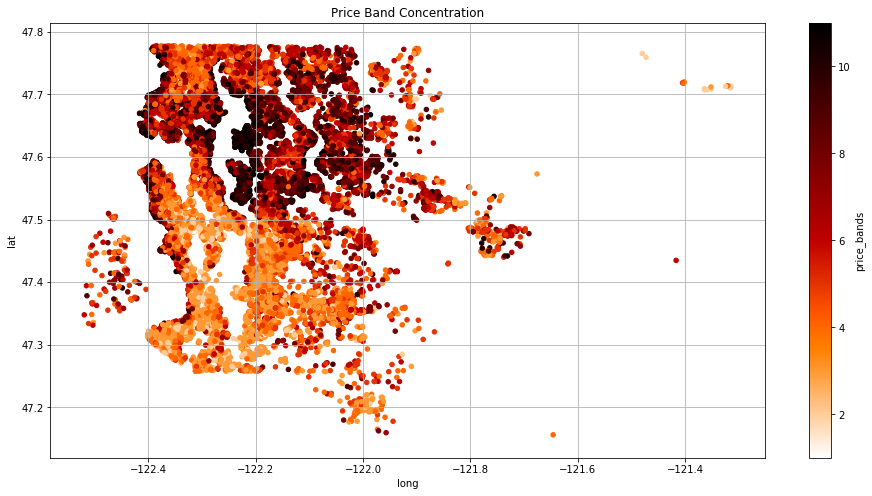

In [50]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price_bands",
             cmap="gist_heat_r", colorbar=True, sharex=False, )
plt.grid(which='both')
plt.title('Price Band Concentration')
plt.show()
# since we suggestedprice band 3-6 viewing it on a map is a more clear then price range and is less spread

in the heat map we can see that the south tends to be cheaper then the northern parts, which can show us that if we are focusing efforts and resources in price bands between 3-6 then houses in that price band tend to be in the central southern area of Seattle

In [51]:
#created a new table which shows id's and zipcode.
zip_id = df.loc[:, ['id', 'zipcode']]
zip_id.head()

,id,zipcode
0,7129300520,98178
1,6414100192,98125
2,5631500400,98028
3,2487200875,98136
4,1954400510,98074


In [52]:
#this duplicate counter will count how many times a zipcode is repeated 
#telling us how many times a house was sold in that zipcode
def dup_counter(data):
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    for val in values:
        if val in dup_dict:
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1
            
    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
#dup_dict.items() will return the key, pair value in a tuple.    
    for d in dup_temp:
        dup_list.append(d)
    return dup_list

zipcode_count = dup_counter(zip_id['zipcode'])
df_zipcode_count = pd.DataFrame(zipcode_count).rename(columns={0:'zipcode', 1:'count'})
df_zipcode_count

,zipcode,count
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553
...,...,...
65,98102,104
66,98010,100
67,98024,80
68,98148,57


In [53]:
zip_price_groupby = df.groupby('zipcode')['price'].median()
df_zipcode_median = pd.DataFrame(zip_price_groupby).reset_index()
df_zipcode_median

,zipcode,price
0,98001,260000.0
1,98002,235000.0
2,98003,267475.0
3,98004,1150000.0
4,98005,765475.0
...,...,...
65,98177,554000.0
66,98178,278277.0
67,98188,264000.0
68,98198,265000.0


based on the mean of each zipcode we see how many zipcodes fall into each price bands, as you can see again price bands between 3-6 have the most zipcode and that would be towards the souther part of King County based on the HeatMap


In [54]:
zipcode_suggestion = df_zipcode_median[(df_zipcode_median['price'] > 300000)&
                                          (df_zipcode_median['price'] < 600000)]
zipcode_suggestion_df = pd.DataFrame(zipcode_suggestion['zipcode'].value_counts())
print('Number of',zipcode_suggestion_df.count())

Number of zipcode    38
dtype: int64


In [55]:
zipcode_suggestion_list = list(zipcode_suggestion['zipcode'])

In [56]:
zipcode_list_count =  df_zipcode_count[df_zipcode_count['zipcode'].isin(zipcode_suggestion_list)]
zipcode_list_count

,zipcode,count
0,98103,602
1,98038,589
2,98115,583
4,98117,553
6,98034,545
7,98118,507
10,98133,493
11,98059,468
12,98058,455
13,98155,446


These 38 Zipcodes based on the median price of the houses in that zipcode are within the 3-6 price band range.
It also shows which zipcode has the most houses being sold so it may be most profitable to focus on those zipcodes first as it may mean that those zipcodes have the most activity

-----
# Q3. How accuratly can we predict the prices of houses based on certain features using different Machine Learning Techniques

### Pipeline
will use a pipeline to apply an imputer and transformation on our features


I will be applying a variety of different Machine Learning, from Multiple Linear Regression, KNN and finally a RandomForest

In [57]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_bands
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,6
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,6


In [58]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

X = df[['bedrooms', 'bathrooms', 'grade','condition','floors', 'zipcode','yr_built']]
y = df['price']

# setting up KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [59]:
#Multiple Linear Regression
lr = LinearRegression()
cross_val_score(lr, X, y, cv=kf).mean()

0.5646311915108067

In [60]:
#KNN
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

knn = KNeighborsRegressor(n_neighbors=4)
cross_val_score(knn, X_scaled, y, cv=kf).mean()

0.6171806466470804

its important to scale for KNN since KNN measures using uclidean distance and the different scales will cause features liek yr_built and zipcode to out weigh features like grade and beedrooms, so we use StandardScale to level the playing field 

In [61]:
#RandomFroest
rfr = RandomForestRegressor(n_estimators=100)
cross_val_score(rfr, X, y, cv=kf).mean()

0.7453712323255781

Random Forest performs the best by far, lets try some gridsearch with different parameters to see if we can get a better score.

In [62]:
grid = {'n_estimators': [100,150,200],
        'max_depth': range (5, 14),
        'min_samples_leaf': [10,20],
        'min_samples_split':[2, 5, 10],
       'max_features': [0.6, 0.7, 0.8]}
gs = GridSearchCV(rfr, grid, cv=kf, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'max_depth': range(5, 14), 'min_samples_leaf': [10, 20], 'min_samples_split': [2, 5, 10], 'max_features': [0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
gs.best_params_

{'max_depth': 13,
 'max_features': 0.8,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 100}

In [64]:
gs.best_score_

0.7218546366960331

In [65]:
df_results = pd.DataFrame(gs.cv_results_)
df_results.pivot_table(index=['param_max_depth', 'param_n_estimators'],
                 columns=['param_min_samples_leaf', 'param_max_features', 'param_min_samples_split'],
                 values='mean_test_score').round(3) \
          .style.background_gradient('coolwarm', axis=None)

In [66]:
gs.best_params_

{'max_depth': 13,
 'max_features': 0.8,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 100}

I will keep all best parameters constant but do another grid search on max_depth as i can see based on the gridsearch that i may be able to get a better score with a higher max_depth, although i must make sure not to overfit as well

although n_estimators = 200 is the best parameter we can see that there is almost next to know difference between 150 and 200 estimators so we will use 150 instead. Now we will find the best max_depth to use while making sure not to go over 15 since it may lead to over fitting

In [67]:
rfr = RandomForestRegressor(n_estimators=150, max_features=0.8, min_samples_leaf=10, min_impurity_split=5)
grid = {'max_depth': range(11, 18)}
gs2 = GridSearchCV(rfr, grid, cv=kf, n_jobs=-1)
gs2.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=5,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(11, 18)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [68]:
df_results2 = pd.DataFrame(gs2.cv_results_)
df_results2[['param_max_depth','mean_train_score']].style.background_gradient('coolwarm', axis=None)

,param_max_depth,mean_train_score
0,11,0.760455
1,12,0.766020
2,13,0.771186
3,14,0.775055
4,15,0.777682
5,16,0.779427
6,17,0.780517


we can see that the max_depth starts to slow down after 14, i think that a max depth of over 14 may be to much and we still improve our score by almost 6% if we were to take max_depth of 14, and this would also be safer and less likely to cause over fitting compared to max_depth of 17, which although does give us a better score, the trade off of being more likely to overfit for less than a 1% increase in score is not worth it.

In [69]:
rfr = RandomForestRegressor(n_estimators=150, max_features=0.8, min_samples_leaf=10, min_impurity_split=5, max_depth=14)
rfr.fit(X,y);

In [70]:
rfr.score(X,y)

0.7800733064543119

we can see that after using our grid search we are able to get a score of 78% which will allow us to predict the prices of new houses based on the features we selected with descent accuracy 

# Findings
We cleaned the Dataset, and answered the 3 questions which are meant to have direct and immediate effects on deceision making of our client(Real Estate agency)

We were able to explain and show through analysis the price range that is most suitable for them through both the prices and activity, We then showed them the exact locations that met those conditions and even gave them a list of suggested zipcodes that are within the price bands and the number of corrosponding houses being bought and sold in that zipcode.

We finally used different machine learning methods in order to be able to predict the prices of houses based on ceratain prominent features that are most important, This allows us to be able help the real estate agency do two important tasks.
1. Be able to predict if a house is worth buying based on the price compared to its features, i.e will the real estate agnecy make a profit by buying/flipping this house?
2. as well as be able to make accurate estimations when selling a house to maximize profits for the features the house has, i.e what is a reasonable price to sell a house with these features while making maximum profits

# Further Works
there are a few things i have in mind to do for future works
1. Add more features that can effect the prices, a main feature i would like to add more features such as details on geographical locations this would mean collecting more data on specific details on each zipcode or lat/long location such as schools in that area, shopping malls,public transportation, etc. these factors may have a direct negative or positive influence on the price of a house(External factors that affect the price of a house)
2. I want to build a pipeline for the whole process, do the Imputation, Transformation and Machine Learning all at once
